# Importing libraries and dataset

In [10]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
#import our SVR from sklearn.svm
#import r2_score from sklearn.metrics
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
warnings.filterwarnings('ignore')

In [11]:
#Importing databases from the .xlsx excel file
# I have renamed the excel data files to Data_Train.xlsx and Data_Test.xlsx repectively
Train=pd.read_excel('Data_Train.xlsx')
Test=pd.read_excel('Data_Test.xlsx')

In [12]:
Train.shape, Test.shape
Train


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


# Exploring Data

In [16]:
Train.duplicated().sum(),Test.duplicated().sum()

(0, 0)

In [9]:
Train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 376.2+ KB


In [11]:
Train.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [12]:
Train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [13]:
Train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

# Data preprocessing

In [14]:
Train=Train[Train['Kilometers_Driven'] < 700000]
Train=Train[Train['Kilometers_Driven'] > 999]

In [15]:
Train = Train[Train['Fuel_Type'] != 'Electric']
len(Train)

6012

In [16]:
Train = Train[Train['Name'] != 'Ambassador Classic Nova Diesel']
Train = Train[Train['Name'] != 'Lamborghini Gallardo Coupe']
Train = Train[Train['Name'] != 'Force One LX 4x4']
Train = Train[Train['Name'] != 'Force One LX ABS 7 Seating']
Train = Train[Train['Name'] != 'Smart Fortwo CDI AT']
len(Train)

6006

In [17]:
a=Train.copy()

In [18]:
a.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [19]:
a['Car_Age'] = 2019 - a['Year']

In [20]:
a['Mileage'] = a['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

In [21]:
a['Engine'] = a['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [22]:
a['Power'] = a['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

In [23]:
a['Seats'] = a['Seats'].fillna(5)

In [24]:
a['Year'] = a['Year'].astype('category')
a['Location'] = a['Location'].astype('category')
a['Fuel_Type'] = a['Fuel_Type'].astype('category')
a['Transmission'] = a['Transmission'].astype('category')
a['Owner_Type'] = a['Owner_Type'].astype('category')
a['Name'] = a['Name'].str.lower() 

# Handling Null values

In [25]:
a.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                 0
Price                 0
Car_Age               0
dtype: int64

In [26]:
a['Car_Brand1'] = a['Name'].apply(lambda x: ''.join(x.split(' ')[0]))

a['Engine'] = a.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Engine']
a['Power'] = a.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Power']
a['Name'] = a['Name'].str.lower() 
a

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand1
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,9,maruti
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4,hyundai
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,8,honda
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,7,maruti
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,6,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,maruti swift vdi,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,5,maruti
6015,hyundai xcent 1.1 crdi s,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,4,hyundai
6016,mahindra xylo d4 bsiv,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,7,mahindra
6017,maruti wagon r vxi,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,6,maruti


In [27]:
a.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Car_Brand1           0
dtype: int64

In [28]:
a['Car_Brand2'] = a['Name'].apply(lambda x: x.split(' ')[1])
a['Car_Brand3'] = a['Name'].apply(lambda x: x.split(' ')[2:])
a['Car_Brand3']=a['Car_Brand3'].astype(str).str.replace('\[|\]|\'', '')
#a['Car_Brand1']=a['Car_Brand1'].str.replace(' ', '')

In [29]:
a.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand1,Car_Brand2,Car_Brand3
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,9,maruti,wagon,"r, lxi, cng"
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4,hyundai,creta,"1.6, crdi, sx, option"
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,8,honda,jazz,v
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,7,maruti,ertiga,vdi
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,6,audi,a4,"new, 2.0, tdi, multitronic"


In [30]:
a.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Car_Brand1           0
Car_Brand2           0
Car_Brand3           0
dtype: int64

In [31]:
def aggregate(a):        
    
    agg_func= {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
    agg_df = a.groupby(['Car_Brand1']).agg(agg_func)
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)
    
    agg_df = pd.merge(a, agg_df, on='Car_Brand1', how='left')
    
    return agg_df

In [32]:
a=aggregate(a)

In [69]:
a.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand1,Car_Brand2,Car_Brand3,Location_count,Mileage_mean,Power_mean,Engine_mean
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,9,maruti,wagon,"r, lxi, cng",1209,21.503044,72.724152,1150.426799
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4,hyundai,creta,"1.6, crdi, sx, option",1107,18.729106,88.664923,1305.649503
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,8,honda,jazz,v,608,18.397204,108.264507,1502.401316


In [71]:
a.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand1,Car_Brand2,Car_Brand3,Location_count,Mileage_mean,Power_mean,Engine_mean
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,9,maruti,wagon,"r, lxi, cng",1209,21.503044,72.724152,1150.426799
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4,hyundai,creta,"1.6, crdi, sx, option",1107,18.729106,88.664923,1305.649503
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,8,honda,jazz,v,608,18.397204,108.264507,1502.401316


In [35]:
#a['Location'] = a['Location'].str.lower() 

In [36]:
#a['Fuel_Type'] = a['Fuel_Type'].str.lower() 

In [37]:
#a['Transmission'] = a['Transmission'].str.lower() 

In [38]:
#a['Owner_Type']=a['Owner_Type'].str.lower()

In [39]:
#a.head(2)

# One hot encoding with get_dummies in pandas

In [40]:
col_names=["Car_Brand1","Car_Brand2","Location","Fuel_Type","Transmission","Owner_Type"]

In [41]:
a_processed=pd.get_dummies(a,prefix_sep="_",columns=col_names)
a_processed.head()
# One Hot Encoding
a.Location

0           Mumbai
1             Pune
2          Chennai
3          Chennai
4       Coimbatore
           ...    
6001         Delhi
6002        Jaipur
6003        Jaipur
6004       Kolkata
6005     Hyderabad
Name: Location, Length: 6006, dtype: category
Categories (11, object): [Ahmedabad, Bangalore, Chennai, Coimbatore, ..., Kochi, Kolkata, Mumbai, Pune]

In [42]:
for column_name in a_processed.columns:
    print(column_name)

Name
Year
Kilometers_Driven
Mileage
Engine
Power
Seats
Price
Car_Age
Car_Brand3
Location_count
Mileage_mean
Power_mean
Engine_mean
Car_Brand1_audi
Car_Brand1_bentley
Car_Brand1_bmw
Car_Brand1_chevrolet
Car_Brand1_datsun
Car_Brand1_fiat
Car_Brand1_ford
Car_Brand1_honda
Car_Brand1_hyundai
Car_Brand1_isuzu
Car_Brand1_jaguar
Car_Brand1_jeep
Car_Brand1_land
Car_Brand1_mahindra
Car_Brand1_maruti
Car_Brand1_mercedes-benz
Car_Brand1_mini
Car_Brand1_mitsubishi
Car_Brand1_nissan
Car_Brand1_porsche
Car_Brand1_renault
Car_Brand1_skoda
Car_Brand1_tata
Car_Brand1_toyota
Car_Brand1_volkswagen
Car_Brand1_volvo
Car_Brand2_1
Car_Brand2_1000
Car_Brand2_3
Car_Brand2_5
Car_Brand2_6
Car_Brand2_7
Car_Brand2_800
Car_Brand2_a
Car_Brand2_a-star
Car_Brand2_a3
Car_Brand2_a4
Car_Brand2_a6
Car_Brand2_a7
Car_Brand2_a8
Car_Brand2_accent
Car_Brand2_accord
Car_Brand2_alto
Car_Brand2_amaze
Car_Brand2_ameo
Car_Brand2_aspire
Car_Brand2_aveo
Car_Brand2_avventura
Car_Brand2_b
Car_Brand2_baleno
Car_Brand2_beat
Car_Brand2_bee

In [43]:
a.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand1,Car_Brand2,Car_Brand3,Location_count,Mileage_mean,Power_mean,Engine_mean
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,9,maruti,wagon,"r, lxi, cng",1209,21.503044,72.724152,1150.426799
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4,hyundai,creta,"1.6, crdi, sx, option",1107,18.729106,88.664923,1305.649503
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,8,honda,jazz,v,608,18.397204,108.264507,1502.401316
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,7,maruti,ertiga,vdi,1209,21.503044,72.724152,1150.426799
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,6,audi,a4,"new, 2.0, tdi, multitronic",236,15.171780,191.292034,2281.758475


In [44]:
brand2_columns = [c for c in a_processed.columns if c.startswith('Car_Brand2')]
a_processed = a_processed.drop(columns=brand2_columns)
a_processed.shape

(6006, 61)

# EDA

In [7]:
dataset = a.copy(deep=True)  # copying dataset

TypeError: copy() takes no keyword arguments

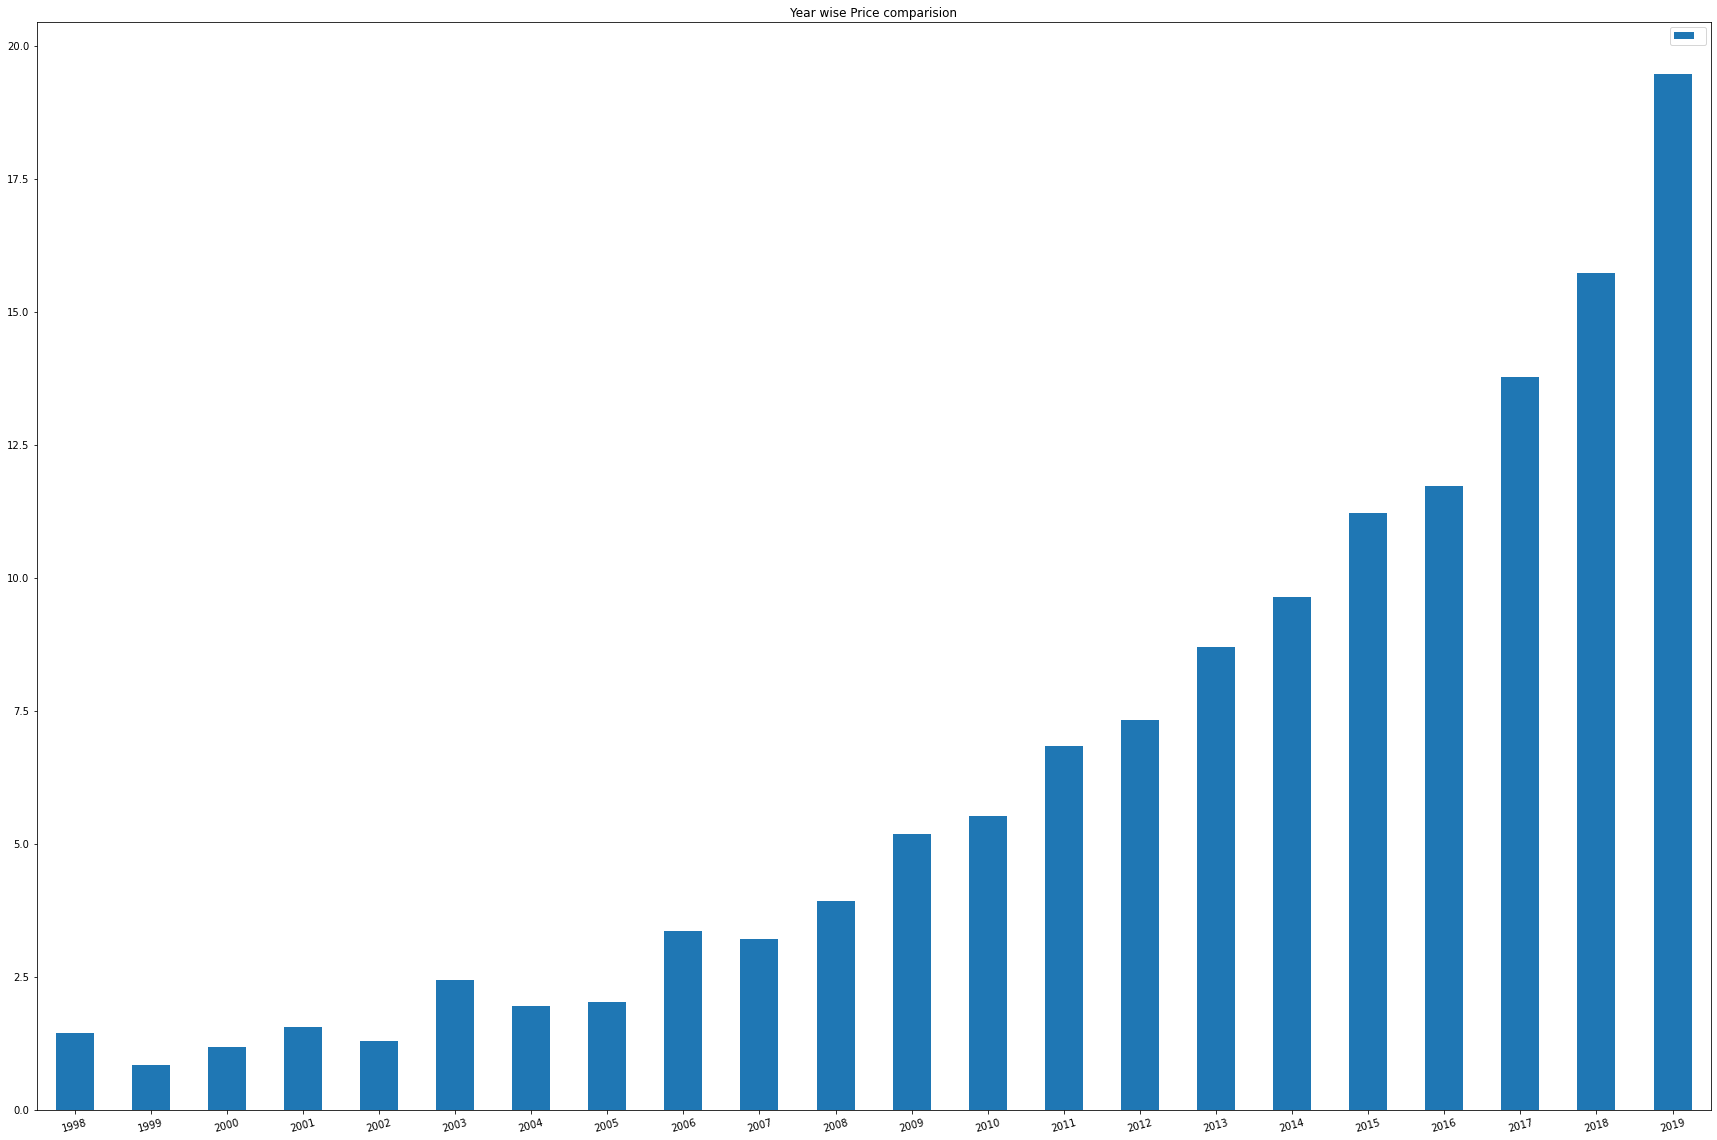

In [8]:
data=pd.read_csv('Data_Train.csv') 
a=list(set(data['Year']))
b=[]
for i in range(len(a)):
    year=data.loc[data['Year']==a[i]]
    b.append(year.mean()[3])
arr=np.array(b)

#bar graph
data = {"":[b[i] for i in range(len(a))]}
index = [a[i] for i in range(len(a))]
dataFrame = pd.DataFrame(data=data, index=index)
dataFrame.plot.bar(rot=15, title="Year wise Price comparision",figsize=(30,20))
plt.show()

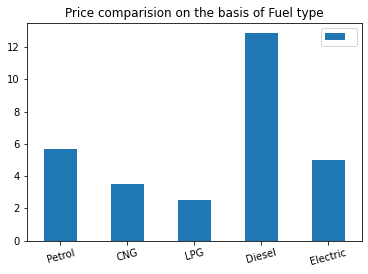

In [88]:
data=pd.read_csv('Data_Train.csv') 
a=list(set(data['Fuel_Type']))
b=[]
for i in range(len(a)):
    year=data.loc[data['Fuel_Type']==a[i]]
    b.append(year.mean()[3])
arr=np.array(b)
#bar graph
data = {"":[b[i] for i in range(len(a))]
}
index = [a[i] for i in range(len(a))]
dataFrame = pd.DataFrame(data=data, index=index)
dataFrame.plot.bar(rot=15, title="Price comparision on the basis of Fuel type")

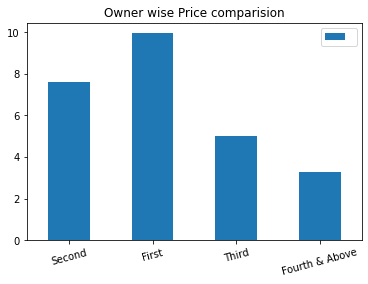

In [92]:
data=pd.read_csv('Data_Train.csv')
a=list(set(data['Owner_Type']))
b=[]
for i in range(len(a)):
    year=data.loc[data['Owner_Type']==a[i]]
    b.append(year.mean()[3])
arr=np.array(b)
#bar graph
data = {"":[b[i] for i in range(len(a))]
}
index = [a[i] for i in range(len(a))]
dataFrame = pd.DataFrame(data=data, index=index)
dataFrame.plot.bar(rot=15, title="Owner wise Price comparision")
plt.show()

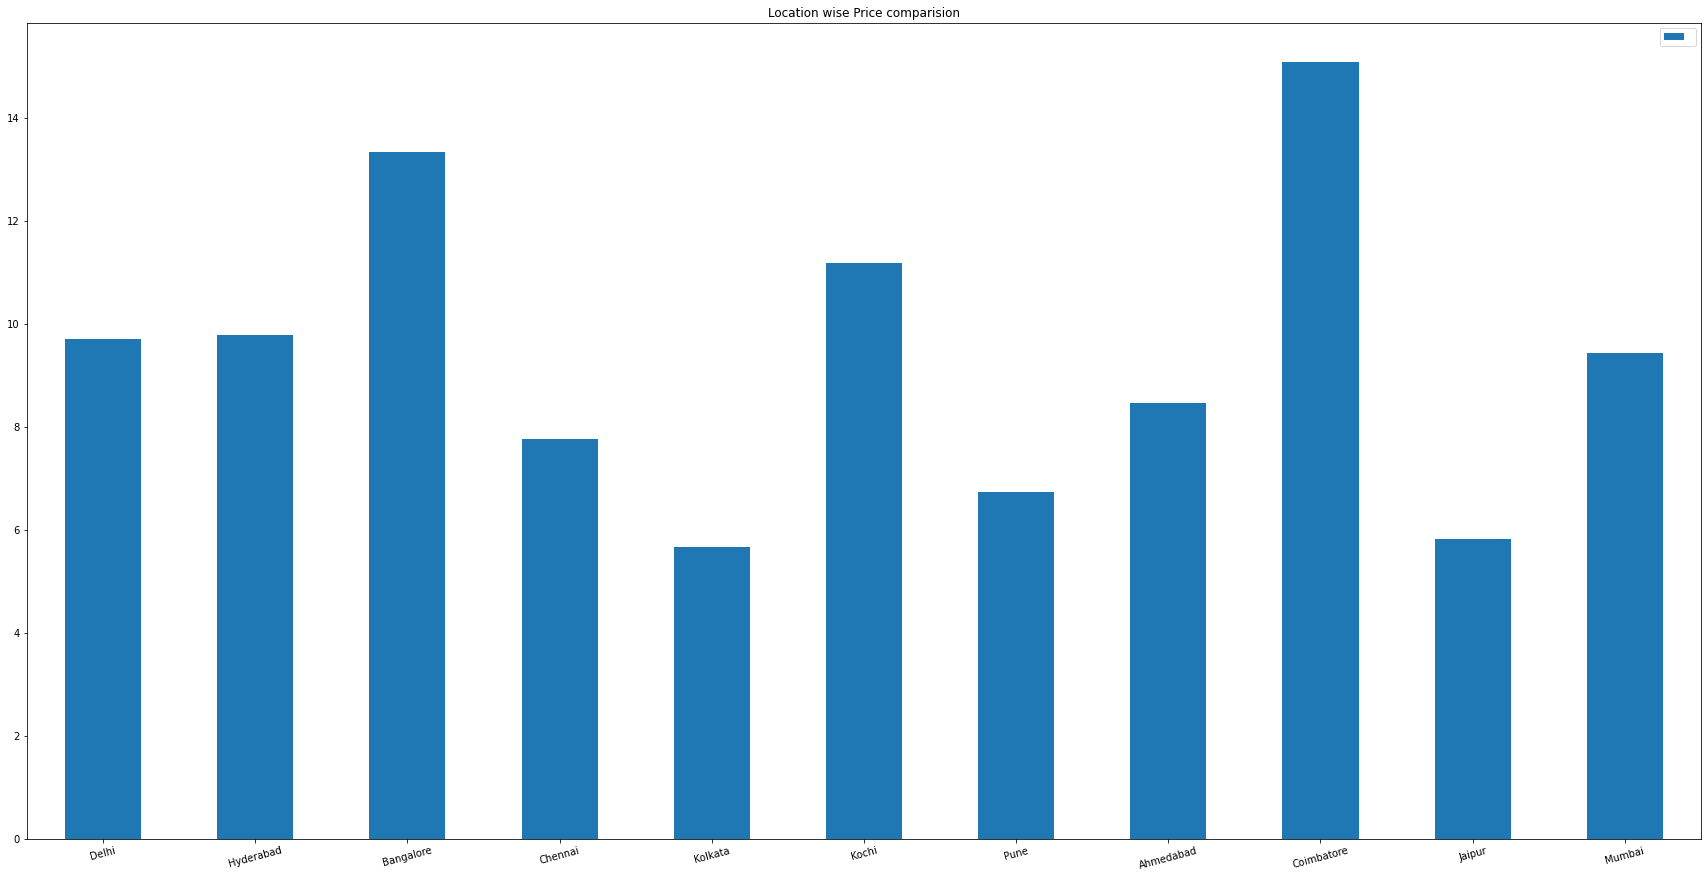

In [107]:
data=pd.read_csv('Data_Train.csv') 
a=list(set(data['Location']))
b=[]
for i in range(len(a)):
    year=data.loc[data['Location']==a[i]]
    b.append(year.mean()[3])
arr=np.array(b)
#bar graph
data = {"":[b[i] for i in range(len(a))]
}
index = [a[i] for i in range(len(a))]
dataFrame = pd.DataFrame(data=data, index=index)
dataFrame.plot.bar(rot=15, title="Location wise Price comparision",figsize=(30,15))
plt.show()

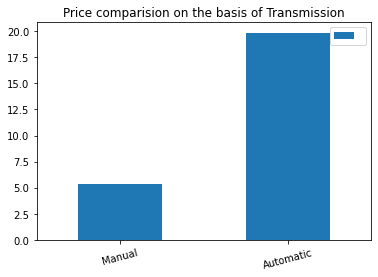

In [104]:
data=pd.read_csv('Data_Train.csv') 
a=list(set(data['Transmission']))
b=[]
for i in range(len(a)):
    year=data.loc[data['Transmission']==a[i]]
    b.append(year.mean()[3])
arr=np.array(b)
#bar graph
data = {"":[b[i] for i in range(len(a))]}
index = [a[i] for i in range(len(a))]
dataFrame = pd.DataFrame(data=data, index=index)
dataFrame.plot.bar(rot=15, title="Price comparision on the basis of Transmission")
plt.show()

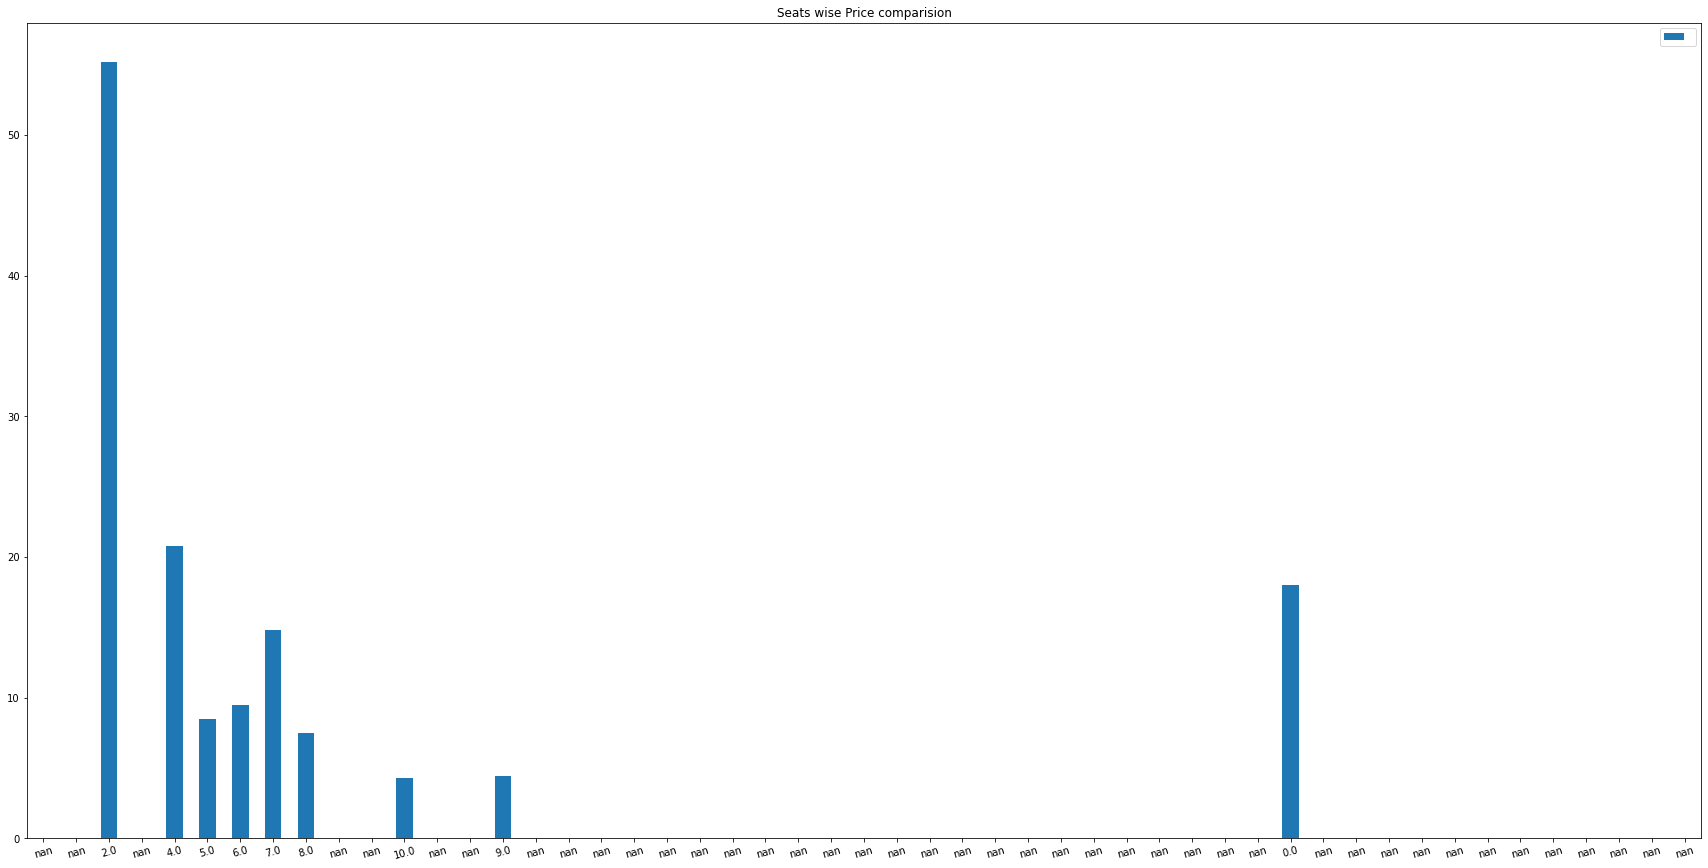

In [109]:
data=pd.read_csv('Data_Train.csv') 
a=list(set(data['Seats']))
b=[]
for i in range(len(a)):
    year=data.loc[data['Seats']==a[i]]
    b.append(year.mean()[3])
arr=np.array(b)
#bar graph
data = {"":[b[i] for i in range(len(a))]
}
index = [a[i] for i in range(len(a))]
dataFrame = pd.DataFrame(data=data, index=index)
dataFrame.plot.bar(rot=15, title="Seats wise Price comparision",figsize=(30,15))
plt.show()

#### From the above Bar graphs we can say that price of car increases every year and highest price is in 2019, Diesel cars have highest price, First-hand cars have highest cars, cars from the city Coimbatore have highest price, Automatic cars are costly than Manual, cars with 2 seats have highest price

In [115]:
df_train = pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel('Data_Test.xlsx')

In [116]:
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()
print("Skew ", df_train['Price'].skew())
print("kurt ", df_train['Price'].kurt())

Skew  3.3352319876668415
kurt  17.09220197043644


In [117]:
#A trial to check log of target label to avoid skew & kurt
df_test1 = np.log1p(df_train['Price'].values)
df_test1 = df_test1.reshape(-1,1)
df_test1 = pd.DataFrame(df_test1, columns=['PriceNew'])
print("Skew ", df_test1['PriceNew'].skew())
print("kurt ", df_test1['PriceNew'].kurt())

Skew  0.7543716000992179
kurt  0.31018039291429167


In [118]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [119]:
df_test.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
713,Hyundai Xcent 1.2 Kappa SX Option,Kochi,2015,41721,Petrol,Manual,First,19.1 kmpl,1197 CC,82 bhp,5.0,4.70
3699,Honda City ZX CVT,Hyderabad,2007,81000,Petrol,Automatic,First,16.4 kmpl,1497 CC,78 bhp,5.0,3.25
1455,Toyota Corolla Altis 1.8 G,Mumbai,2010,93000,Petrol,Manual,First,14.28 kmpl,1798 CC,138.03 bhp,5.0,4.50
5109,Hyundai Grand i10 CRDi Magna,Delhi,2015,63776,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.0,3.96
1613,Maruti Ciaz ZXi Option,Kochi,2016,40347,Petrol,Manual,First,20.73 kmpl,1373 CC,91.2 bhp,5.0,7.80


In [120]:
print(df_train.shape)
print(df_test.shape)
df_test.info()

(6019, 12)
(6019, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 376.2+ KB


In [121]:
df_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [123]:
# Price column have outliers
miss_percent = (df_train.isnull().sum() / len(df_train)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_train.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2



1. New_Price have more than 86% missing need to address, this column seems important tocompare price between new car & used car price.                                            
2. Mileage, Engine, Power, Seats have very few missing this can be addressed by filling mean,median or mode to avoid lossing data

In [124]:
miss_percent = (df_test.isnull().sum() / len(df_test)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_test.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2


In [125]:
df_train['brand_name'] = df_train['Name'].apply(lambda x: str(x).split(" ")[0])
df_test['brand_name'] = df_test['Name'].apply(lambda x: str(x).split(" ")[0])
#created a new column as ‘brand_name’
df_train.drop(columns=["Name"], axis=1, inplace=True)
df_test.drop(columns=["Name"], axis=1, inplace=True)

[Text(0, 0, 'Maruti'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Tata'),
 Text(0, 0, 'Land'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Mahindra'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Datsun'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Skoda'),
 Text(0, 0, 'Mini'),
 Text(0, 0, 'Fiat'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Smart'),
 Text(0, 0, 'Ambassador'),
 Text(0, 0, 'Isuzu'),
 Text(0, 0, 'ISUZU'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Bentley'),
 Text(0, 0, 'Lamborghini')]

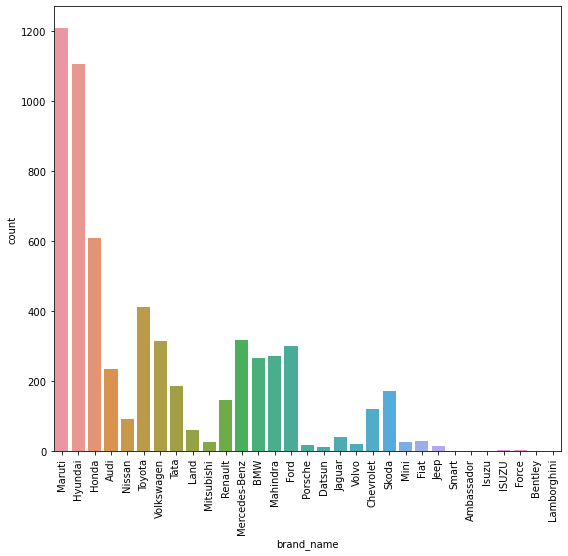

In [126]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='brand_name', data=df_train)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)

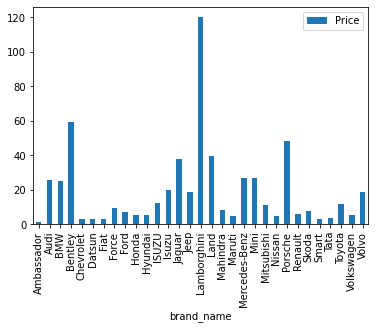

In [128]:
df_vis_1 = pd.DataFrame(df_train.groupby('brand_name')['Price'].mean())
df_vis_1.plot.bar()
plt.show()

#### From above two graphes it is clear that Maruti is leading brand numberwise but Lamborghini is leading pricewise

In [46]:
dataset.describe()
dataset.Location

0           Mumbai
1             Pune
2          Chennai
3          Chennai
4       Coimbatore
           ...    
6001         Delhi
6002        Jaipur
6003        Jaipur
6004       Kolkata
6005     Hyderabad
Name: Location, Length: 6006, dtype: category
Categories (11, object): [Ahmedabad, Bangalore, Chennai, Coimbatore, ..., Kochi, Kolkata, Mumbai, Pune]

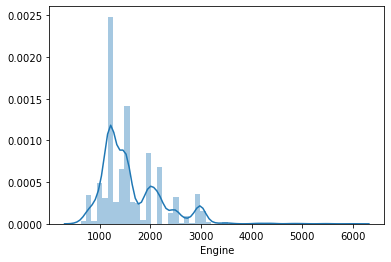

In [47]:
sns.distplot(dataset.Engine)
plt.show()

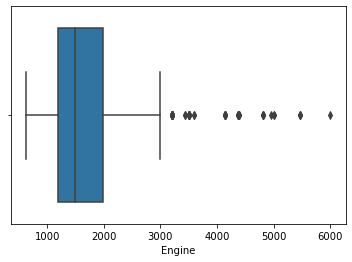

In [48]:
sns.boxplot(dataset.Engine)
plt.show()

- needs to remove some outliers

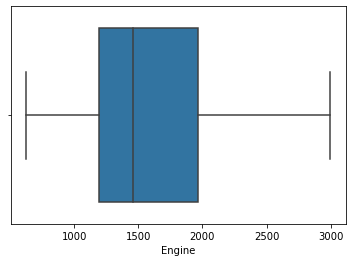

In [49]:
q=dataset.Engine.quantile(0.99) # 99 percentile of Engine value
dataset.Engine=dataset.Engine[dataset.Engine<q]
sns.boxplot(dataset.Engine)
plt.show()

In [50]:
dataset['Engine'].isnull().sum()

61

In [51]:
dataset.Engine.mode()

0    1197.0
dtype: float64

In [52]:
dataset.Engine.fillna(value =1197 , inplace = True)  # mode imputation
dataset.Engine.isnull().sum()

0

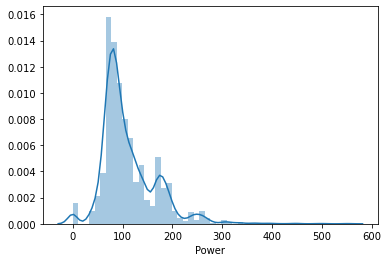

In [53]:
sns.distplot(dataset.Power)
plt.show()

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
Train.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [56]:
Train.Owner_Type.value_counts()

First             4919
Second             967
Third              111
Fourth & Above       9
Name: Owner_Type, dtype: int64

<BarContainer object of 6006 artists>

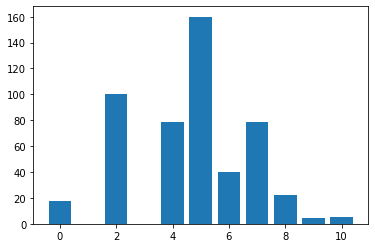

In [57]:
plt.bar(Train["Seats"],Train["Price"])

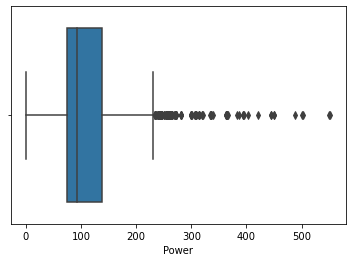

In [58]:
sns.boxplot(dataset['Power'])
plt.show()

In [59]:
#q=dataset.Power.quantile(0.99)
#dataset.Power=dataset.Power[dataset.Power<q]
#sns.distplot(dataset.Power)
#plt.show()

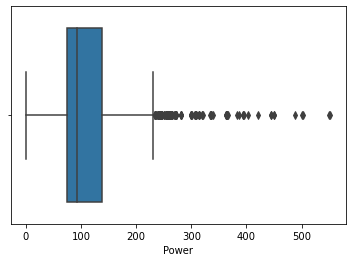

In [60]:
sns.boxplot(dataset.Power)
plt.show()

In [61]:
dataset.Power.isnull().sum()

0

In [62]:
mode_value = dataset.Power.mode()[0]
dataset['Power'].fillna(value = mode_value, inplace = True)
dataset.Power.isnull().sum()

0

In [63]:
dataset.Mileage.isnull().sum()

0

In [64]:
mode_value = dataset.Mileage.mode()[0]
dataset['Mileage'].fillna(value = mode_value, inplace = True)
dataset.Mileage.isnull().sum()

0

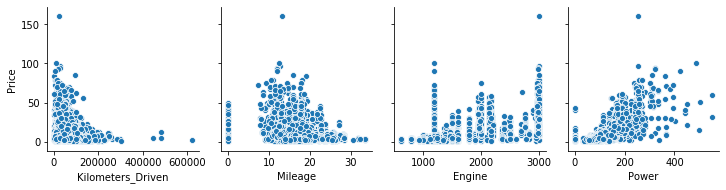

In [59]:
sns.pairplot(data=dataset,y_vars='Price',x_vars=['Kilometers_Driven','Mileage','Engine','Power'])
plt.show()

## From the plots it is clear price do not follow a linear relation with parameters. One of the ways to solve it is to take log of price

# Feature Importance

In [60]:
dataset = dataset.drop(columns=['Car_Brand3','Location_count','Mileage_mean','Power_mean','Engine_mean','Year','Name'], axis=1)
dataset.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand1,Car_Brand2
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,9,maruti,wagon
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,4,hyundai,creta
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,8,honda,jazz
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,7,maruti,ertiga
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,6,audi,a4


<h3> Label encoding for heatmaps </h3>

In [61]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

#Encode labels in column 'species'. 
dataset1=dataset
dataset['Location']= label_encoder.fit_transform(dataset['Location'])

In [62]:
dataset['Fuel_Type']= label_encoder.fit_transform(dataset['Fuel_Type']) 
dataset['Transmission']= label_encoder.fit_transform(dataset['Transmission']) 
dataset['Owner_Type']= label_encoder.fit_transform(dataset['Owner_Type']) 
dataset['Car_Brand1']= label_encoder.fit_transform(dataset['Car_Brand1']) 
dataset['Car_Brand2']= label_encoder.fit_transform(dataset['Car_Brand2']) 
dataset.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand1,Car_Brand2
0,9,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,9,14,184
1,10,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,4,8,53
2,2,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50,8,7,97
3,2,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,7,14,67
4,3,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,6,0,10


In [63]:
dataset.dtypes

Location               int32
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Car_Age                int64
Car_Brand1             int32
Car_Brand2             int32
dtype: object

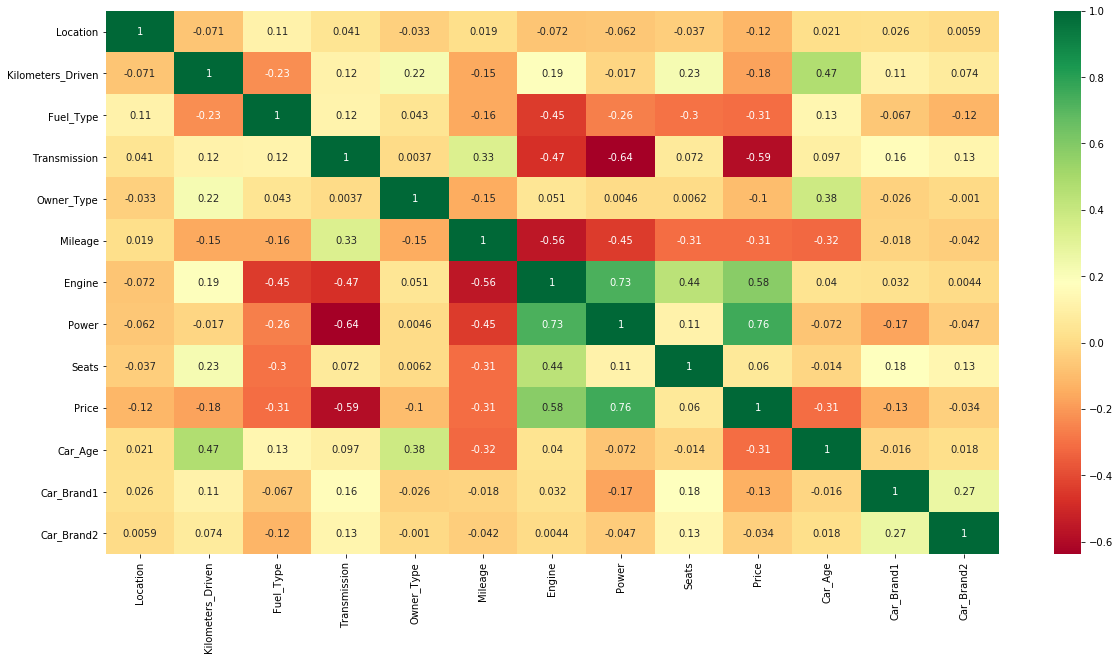

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True,cmap="RdYlGn")
plt.show()

- As car_brand2 has low correlation with price and also contains 220 columns, it is better to drop the car_brand2 column

In [65]:
dataset.isnull().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Car_Brand1           0
Car_Brand2           0
dtype: int64

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [67]:
y = dataset.iloc[:,9]
X = dataset.drop(columns="Price").iloc[:,:]
y=y.astype('int')

In [68]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs         Score
1   Kilometers_Driven  8.857573e+06
6              Engine  5.596142e+05
7               Power  1.074310e+05
11         Car_Brand2  6.969442e+03
9             Car_Age  4.529769e+03
5             Mileage  1.308347e+03
10         Car_Brand1  1.016045e+03
4          Owner_Type  8.609424e+02
3        Transmission  7.765901e+02
2           Fuel_Type  5.883611e+02


[0.15761698 0.21950526 0.01506574 0.01547374 0.0256625  0.08988242
 0.06814376 0.0967819  0.01863725 0.18048767 0.04437126 0.06837153]


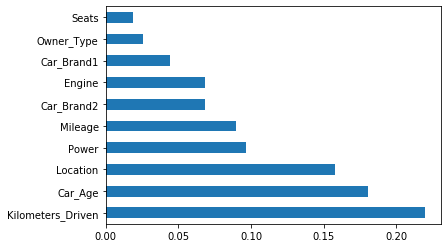

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Linear Regression 

In [70]:
col=['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Car_Age',
       'Car_Brand1', 'Car_Brand2']
dataset1.info()
target=dataset['Price']
dataset2=dataset1
#dataset1 = dataset1.drop(columns="Car_Brand1").iloc[:,:]
dataset1 = dataset1.drop(columns="Car_Brand2").iloc[:,:]
dataset1 = dataset1.drop(columns="Price").iloc[:,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6006 entries, 0 to 6005
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6006 non-null   int32  
 1   Kilometers_Driven  6006 non-null   int64  
 2   Fuel_Type          6006 non-null   int32  
 3   Transmission       6006 non-null   int32  
 4   Owner_Type         6006 non-null   int32  
 5   Mileage            6006 non-null   float64
 6   Engine             6006 non-null   float64
 7   Power              6006 non-null   float64
 8   Seats              6006 non-null   float64
 9   Price              6006 non-null   float64
 10  Car_Age            6006 non-null   int64  
 11  Car_Brand1         6006 non-null   int32  
 12  Car_Brand2         6006 non-null   int32  
dtypes: float64(5), int32(6), int64(2)
memory usage: 516.1 KB


In [71]:
#dataset = dataset.drop(columns="Car_Brand1").iloc[:,:]
dataset = dataset.drop(columns="Car_Brand2").iloc[:,:]
dataset = dataset.drop(columns="Price").iloc[:,:]

In [72]:
inputs=dataset

In [73]:
dataset1.Location.mode()
dataset1.Location.fillna(value ="Mumbai" , inplace = True)
dataset1.Location=Train.Location
dataset1.Fuel_Type=Train.Fuel_Type
input1=dataset1
dataset1

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Car_Brand1
0,Mumbai,72000,CNG,1,0,26.60,998.0,58.16,5.0,9,14
1,Pune,41000,Diesel,1,0,19.67,1582.0,126.20,5.0,4,8
2,Chennai,46000,Petrol,1,0,18.20,1199.0,88.70,5.0,8,7
3,Chennai,87000,Diesel,1,0,20.77,1248.0,88.76,7.0,7,14
4,Coimbatore,40670,Diesel,0,2,15.20,1968.0,140.80,5.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...
6001,Kochi,27365,Diesel,1,0,28.40,1248.0,74.00,5.0,5,14
6002,Mumbai,100000,Petrol,1,0,24.40,1120.0,71.00,5.0,4,8
6003,Bangalore,55000,Petrol,1,2,14.00,2498.0,112.00,8.0,7,13
6004,Coimbatore,46000,Petrol,1,0,18.90,998.0,67.10,5.0,6,14


In [74]:
def roundup(a):
    l=[]
    for i in a:
        i=(i-(i%5))
        l.append(i)
    return l
input1.Car_Age=roundup(input1.Car_Age)

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input1,target,test_size=0.2,random_state=365)
x_train1=x_train
y_train1=y_train
input1
#plt.bar(x_train["Car_Age"],y_train)
x_train.Car_Age.value_counts()

5     2234
0     2005
10     498
15      61
20       6
Name: Car_Age, dtype: int64

In [76]:
x_train1.Location.fillna(value ="Mumbai" , inplace = True)
x_train1.Fuel_Type.fillna(value ="Diesel" , inplace = True)

In [77]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Imputer
#x_train1_num=x_train1.iloc[:,4:11]
#x_train1_num1=x_train1.iloc[:,1:2]
#num_pipeline = Pipeline([
#('imputer', Imputer(strategy="median")),
#('std_scaler', StandardScaler()),
#])
#x_train1_num = num_pipeline.fit_transform(x_train1_num)
#x_train1_num1 = num_pipeline.fit_transform(x_train1_num1)
#x_train1.iloc[:,4:11]=x_train1_num
#x_train1.iloc[:,1:2]=x_train1_num1
#x_train1

In [79]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Imputer

column_trans = make_column_transformer(
    (OneHotEncoder(), [ 'Location','Fuel_Type']),
    remainder='passthrough')

logreg = LinearRegression()
logreg1=SGDRegressor()

pipe = make_pipeline(column_trans, logreg)

cross_val_score(pipe, x_train1, y_train1, cv=5)
scores = cross_validate(pipe, X, y,cv=5,return_train_score=True,)
#sklearn.metrics.SCORERS.keys()
scores

{'fit_time': array([0.00997353, 0.00897479, 0.01000547, 0.01100302, 0.00993633]),
 'score_time': array([0.00299072, 0.0029912 , 0.00398493, 0.00399518, 0.00299168]),
 'test_score': array([0.69812969, 0.68068217, 0.6979919 , 0.64517418, 0.71924793]),
 'train_score': array([0.68994934, 0.69482491, 0.69053998, 0.7030786 , 0.68470416])}

In [80]:
x_train1

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Car_Brand1
1988,Mumbai,68465,Diesel,1,0,15.60,1196.0,70.00,5.0,5,6
4402,Kolkata,12000,Petrol,1,0,22.50,998.0,67.04,5.0,5,14
994,Chennai,93000,Petrol,1,0,0.00,1086.0,62.00,5.0,10,8
4765,Mumbai,47000,Petrol,1,0,22.90,1248.0,74.00,5.0,5,14
1,Pune,41000,Diesel,1,0,19.67,1582.0,126.20,5.0,0,8
...,...,...,...,...,...,...,...,...,...,...,...
226,Coimbatore,46173,Diesel,1,2,19.01,1461.0,108.50,5.0,0,18
428,Pune,37000,Petrol,1,0,23.59,1364.0,67.04,5.0,5,23
4955,Bangalore,152000,Petrol,1,0,17.80,1248.0,75.00,5.0,5,14
4897,Mumbai,68525,Diesel,1,0,23.00,1396.0,90.00,5.0,0,8


In [81]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=365)
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(x_train, y_train)
print('Training accuracy (the coefficient of determination): {:.3f}'.format(lm.score(x_train, y_train)))

Training accuracy (the coefficient of determination): 0.680


In [82]:
prediction = lm.predict(x_test)

In [83]:
print('Testing accuracy by using score function: {:.3f}'.format(lm.score(x_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, lm.predict(x_test))))

Testing accuracy by using score function: 0.700
Testing accuracy by using r2_score meric: 0.700


In [84]:
mean_absolute_error(y_test, prediction)

3.8098278404352213

In [86]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=365)
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor()
clf = SGDRegressor()
#clf = LinearRegression()
# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)
sfs1.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.4s finished

[2020-07-12 11:56:27] Features: 1/7 -- score: 0.3498340195473141[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished

[2020-07-12 11:56:28] Features: 2/7 -- score: 0.40363306076017896[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s finished

[2020-07-12 11:56:29] Features: 3/7 -- score: 0.45517733148110046[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

0.50960715018898

In [87]:
sfs1.k_feature_names_

('Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Car_Age',
 'Car_Brand1')

In [88]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=365)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.intercept_, lin_reg.coef_
y_pred=lin_reg.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = lin_reg.score(x_test,y_test)
print('accuracy=',accuracy)

Mean Absolute Error: 3.809827840435184
Mean Squared Error: 36.0405419766939
Root Mean Squared Error: 6.003377547405619
accuracy= 0.6998946755360254


# Decision Tree Regression

In [89]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)
# fit the regressor with X and Y data 
regressor.fit(x_train, y_train)
x_train

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Car_Brand1
1988,1,68465,3,1,0,15.60,1196.0,70.00,5.0,8,6
4402,9,12000,3,1,0,22.50,998.0,67.04,5.0,9,14
994,10,93000,3,1,0,0.00,1086.0,62.00,5.0,11,8
4765,8,47000,1,1,0,22.90,1248.0,74.00,5.0,5,14
1,10,41000,1,1,0,19.67,1582.0,126.20,5.0,4,8
...,...,...,...,...,...,...,...,...,...,...,...
226,3,46173,1,1,2,19.01,1461.0,108.50,5.0,4,18
428,1,37000,1,1,0,23.59,1364.0,67.04,5.0,6,23
4955,6,152000,1,1,0,17.80,1248.0,75.00,5.0,9,14
4897,5,68525,1,1,0,23.00,1396.0,90.00,5.0,4,8


In [90]:
y_pred = regressor.predict(x_test)

In [91]:
print(y_pred)

[ 4.9   7.41  5.5  ... 28.5  19.5   6.15]


In [92]:
regressor.score(x_test, y_pred)

1.0

In [93]:
mean_absolute_error(y_test, y_pred)

2.0027371048252913

In [94]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

5.281359104751771

# Random Forest Regression

In [95]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_pred

array([ 4.712,  7.848,  6.   , ..., 30.517, 15.735,  6.501])

In [96]:
regressor.score(x_test, y_pred)

1.0

In [97]:
mean_absolute_error(y_test, y_pred)

1.5489547183265986

In [98]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

3.3065057304984378

# Support_Vector_Machine(Regression)

In [99]:
# To display the dataset in Car_Age, Price:
Svdata = dataset2[['Car_Age','Price']]
Svdata.head()

,Car_Age,Price
0,9,1.75
1,4,12.50
2,8,4.50
3,7,6.00
4,6,17.74


In [100]:
# I need to split this into two differance data one for the independent feature--X,and one for the dependent variable--Y.
# I will split the data X into two separate sets--x_train and x_test. similarly Y .
# Doing this using the sklearn library is very simple.

X = Svdata.Car_Age.values.reshape(-1,1)
Y = Svdata.Price.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [101]:
# To Train the model
SupportVectorRegModel = SVR()
SupportVectorRegModel.fit(x_train,y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [102]:
# To Predict the model
y_pred = SupportVectorRegModel.predict(x_test)
y_pred

array([3.2502862 , 3.74972569, 7.04655772, ..., 5.64984283, 5.64984283,
       3.2502862 ])

In [103]:
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. I have a non-linear condition #so I can select polynomial or gaussian but here I select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf') 
regressor.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

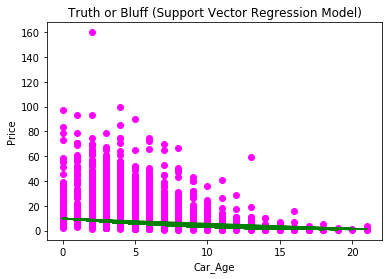

In [104]:
# Visualising the Support Vector Regression results
plt.scatter(X,Y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Car_Age')
plt.ylabel('Price')
plt.show()

In [105]:
# Model Evaluation
# Finally, I need to check to see how well our model is performing on the test data.
# For this, we evaluate our model by finding the root mean squared error produced by the model.
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse


11.799144082530969

# Conclusion

Starting with the data preprocessing, all the XLSX files were read and shape of both the XLSX files were tested.
duplicated().sum() were also checked. Train.info() was used to see all the data types & Train.describe() was also used to get key informations. Checked for head() of the train to see the sample from the dataset, checked isnull().sum() to check for the null values. Checked nunique(). In total 5 entries were checked for head() of the train. Limitations were set of kilometers 
driven as <700000 and >999 to eliminate the peaks and then eliminated the fuel type electric. Eliminated names with ambassador,
Lamborghini,force 1(both). Converted datatypes to float and then processed the car brand into 3 column. Grouped engine and power with respect to car brand1. Then again checked for head,null and nunique. Created an aggregate function to find mean value for 
location, mileage, power, engine and grouped according to car brand1. Following with the one hot encoding with get_dummies.

For the data insights central tendencies were measured and checked.
For Exploratory Data Analysis we have shown data distribution through visualisation (BoxPlots,histograms,etc).
Feature importance, outliers,null values were included in it.

We tried different models and did testing performance of them using appropriate metric/error metrics. Models included 
linear regression, SVM regression, random forest regression, decision tree regression. Out of these we found that random forest
and decision tree regression were best suited and hence we implemented it.
